In [224]:
import pandas as pd
from mmcv import Config
from utils import *

config_path = '/Users/KC/My Drive/soundmouse/config/cfg_setting.py'
cfg = Config.fromfile(config_path)
filename = 'data.csv'
path = cfg.filepath_save + filename
df = pd.read_csv(path)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,live,outlier
0,-1.509609,-0.950819,1.371512,-1.484222,0.640996,-0.381994,1.196042,2.235733,2.802696,-1.827616,-1.154106,4.978012,0.292319,0,1
1,1.588714,-0.458713,0.515464,-0.133135,0.640996,1.764213,0.532930,-0.538791,-0.250113,1.637829,-1.805774,-0.384110,0.292319,0,0
2,-1.228465,-1.121164,-0.625932,-0.558317,0.640996,-0.397308,1.140341,2.346335,-0.606778,-1.904319,-0.197504,2.247228,0.292319,0,0
3,-1.532560,-0.579847,-0.055234,0.418419,0.640996,-0.388801,1.156256,-0.538704,1.085869,-1.422624,-0.530532,-0.141447,-1.633903,0,1
4,-0.712078,-1.018957,-0.625932,0.280751,0.640996,-0.374054,1.129731,-0.538786,0.167003,-1.085130,-0.479878,-0.498083,0.292319,0,0


In [225]:
df=df.loc[:4999]
df.shape

(5000, 15)

In [226]:
df['outlier'].sum()

1417

## analysis of audio samples

In [227]:
# select an outlier sample
max_liveness = df.groupby(by=["outlier"])['liveness'].max()
print(max_liveness)
max_liveness = max_liveness[1]
fprint('outlier with max liveness', df.index[(df['outlier']==1) & (df['liveness']>max_liveness-0.1)])
outlier_samples = df.loc[3269]

outlier
0    4.700879
1    4.743195
Name: liveness, dtype: float64
outlier with max liveness: Int64Index([1269, 3029, 3269, 4697, 4845], dtype='int64') 


In [228]:
# select a live music sample
min_liveness = df.groupby(by=["live"])['liveness'].min()
print(min_liveness)
min_liveness = min_liveness[1]
fprint('outlier with max liveness', df.index[(df['live']==1) & (df['liveness']>min_liveness-0.1)])
live_samples = df.loc[3352]

live
0   -1.059561
1   -0.898155
Name: liveness, dtype: float64
outlier with max liveness: Int64Index([ 770, 1014, 1028, 1033, 1050, 1072, 1138, 1157, 1194, 1225, 1241,
            1284, 1291, 1418, 1422, 1665, 1671, 1674, 1720, 1729, 1730, 1755,
            1757, 2221, 2242, 2252, 2254, 2255, 2258, 2259, 2273, 2278, 2380,
            2384, 2389, 3096, 3107, 3172, 3220, 3221, 3230, 3234, 3236, 3237,
            3239, 3241, 3245, 3246, 3247, 3250, 3253, 3254, 3256, 3257, 3258,
            3259, 3260, 3262, 3264, 3265, 3266, 3274, 3277, 3282, 3285, 3287,
            3289, 3294, 3298, 3302, 3307, 3309, 3314, 3316, 3318, 3336, 3341,
            3347, 3352, 3400, 3551, 3579, 3582, 3585, 3586, 3591, 3597, 4532,
            4537, 4545, 4560, 4567, 4998],
           dtype='int64') 


In [229]:
import matplotlib.pyplot as plt #visualisation

#audio analysis library
import librosa
import librosa.display

In [230]:
filesave_path = '/Volumes/ehd/prog/data/soundmouse/audio_sample30s/'
file_name = '3269.mp3'
path_outlier = filesave_path + file_name
file_name = '3172.mp3'
path_live = filesave_path + file_name

/Users/KC/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


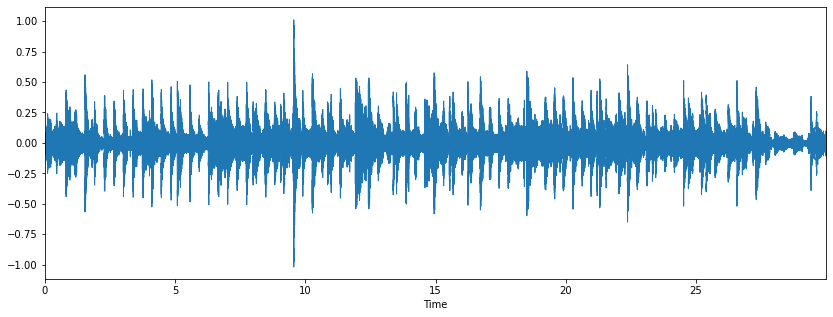

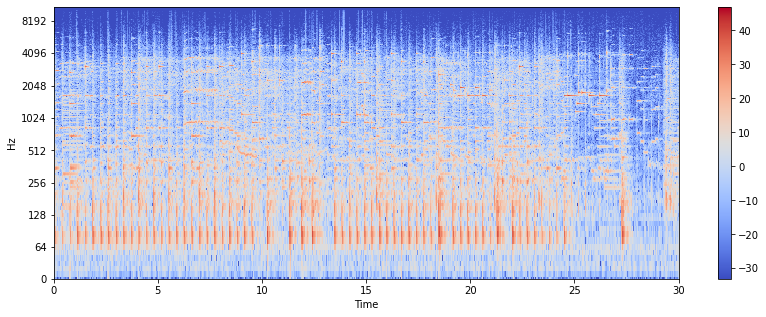

In [231]:
show_freq_spec(path_outlier, log_scale=True)

/Users/KC/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


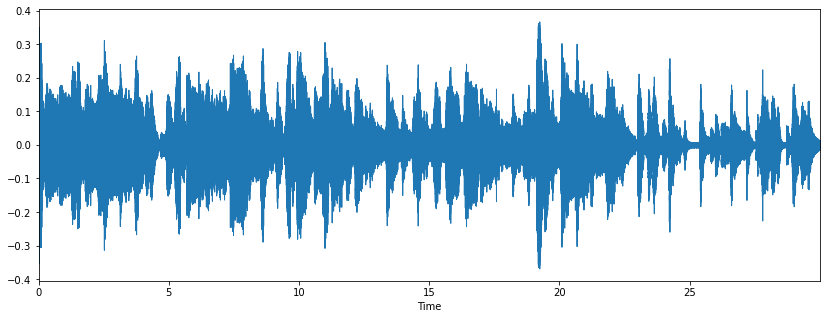

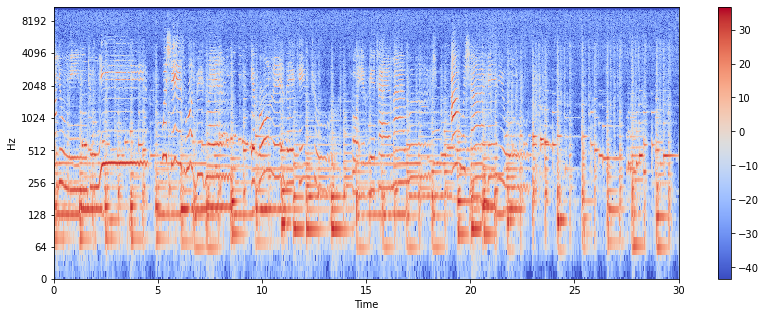

In [232]:
show_freq_spec(path_live, log_scale=True)

# Data preparation

In [233]:
import pandas as pd
from mmcv import Config
from utils import *
from tqdm import tqdm

import glob
import os.path

config_path = '/Users/KC/My Drive/soundmouse/config/cfg_setting.py'
cfg = Config.fromfile(config_path)
filename = 'task100k_preview_urls.csv'
path = cfg.filepath_save + filename
df2 = pd.read_csv(path)[:5000]
print(df2.shape)
df2.head()

(5000, 10)


,id,name,artists,duration_ms,popularity,release_date,tempo,key,liveness,preview_url
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",831667,4,1921,80.954,10,0.665,https://p.scdn.co/mp3-preview/8135db88d35b4259...
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,['Dennis Day'],180533,5,1921,60.936,7,0.160,https://p.scdn.co/mp3-preview/8135db88d35b4259...
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,500062,5,1921,110.339,3,0.101,https://p.scdn.co/mp3-preview/8135db88d35b4259...
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,['Frank Parker'],210000,3,1921,100.109,5,0.381,https://p.scdn.co/mp3-preview/8135db88d35b4259...
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,['Phil Regan'],166693,2,1921,101.665,3,0.229,https://p.scdn.co/mp3-preview/8135db88d35b4259...


In [234]:
import warnings

def save_spectrum_image():
    warnings.filterwarnings("ignore")
    filesave_path = '/Volumes/ehd/prog/data/soundmouse/'
    cmap = plt.get_cmap('inferno')
    for i in tqdm(range(data.shape[0])):
        audio_filename = filesave_path +'audio_sample30s/'+ str(i)+'.mp3'
        
        if os.path.isfile(audio_filename)==False:
            continue
        
        t, sr = librosa.load(audio_filename, mono=True)
        #NFFT: the number of data points used
        #Fs: sampling frequency
        #Fc: center frequency
        plt.specgram(t, NFFT=2048, Fs=2, Fc=0, cmap=cmap, scale='dB')
        plt.axis('off')
        imgsave_path = filesave_path + 'img_sample30s/'+ str(i) + '.png'
        plt.savefig(imgsave_path)
        # plt.show()
        plt.clf() #clear current figure


#file name from 0.png to 4999.png

In [235]:
df1=df[['live','outlier']]
data=pd.concat([df2, df1], axis=1)
data=data[['outlier','preview_url']]
data['index'] = range(0,len(data))

null_list = data.index[data['preview_url'].isnull()].tolist()
fprint('the no. of rows',data.shape[0]) 
fprint('the no. of nulls',len(null_list))
data = data.drop(index=null_list)
fprint('remain rows',data.shape[0])
data.reset_index(drop=True, inplace=True)
data.head()

the no. of rows     : 5000 
the no. of nulls    : 786 
remain rows         : 4214 


,outlier,preview_url,index
0,1,https://p.scdn.co/mp3-preview/8135db88d35b4259...,0
1,0,https://p.scdn.co/mp3-preview/8135db88d35b4259...,1
2,0,https://p.scdn.co/mp3-preview/8135db88d35b4259...,2
3,1,https://p.scdn.co/mp3-preview/8135db88d35b4259...,3
4,0,https://p.scdn.co/mp3-preview/8135db88d35b4259...,4


# deep learning model

In [236]:
from torchvision import transforms
# import torchvision.transforms.functional as FF

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torch.nn.init import *

from PIL import Image
import numpy as np

In [247]:
custom_transform = transforms.Compose([
    transforms.Resize((64,64)), 
    # transforms.RandomCrop(60),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

def img_data_save(cfg, df, custom_transform, filename='test.npz'):
    file_path = cfg.img_save_path
    index = df['index']
    labels = df['outlier']
    transform = custom_transform
    
    length = len(index)
    
    imgs = []
    lbs = []
    
    for i in tqdm(range(0, length)):
        path = file_path + str(data['index'][i])+'.png'
        if os.path.isfile(path):
            lb = torch.Tensor(labels[i])
            img = Image.open(path).convert("RGB")
            
            if transform is not None:
                img = transform(img)
                img = torch.permute(img,(1,2,0))
        
        else:
            img = None
            
        lbs.append(lb.numpy())
        imgs.append(img.numpy())
        
        if i > 10:
            break
    
    np_save_path = cfg.np_save_path + filename
    np.savez(np_save_path, x=imgs, y=lbs)
    print("saved at ", np_save_path)

    return np.asarray(lbs), np.asarray(imgs)

lbs, imgs = img_data_save(cfg, data, custom_transform)


  0%|          | 11/4214 [00:00<03:16, 21.43it/s]

saved at  /Users/KC/My Drive/soundmouse/data/test.npz



/Users/KC/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/KC/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


4214
/Volumes/ehd/prog/data/soundmouse/img_sample30s/102.png
<class 'PIL.Image.Image'>
torch.Size([64, 64, 3])


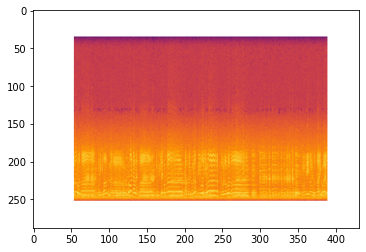

In [246]:
#test sample image
label = data['outlier']
print(len(data['outlier']))
label = torch.Tensor(label[0])
path = cfg.img_save_path + str(data['index'][100])+'.png'
print(path)

im = Image.open(path).convert("RGB")
plt.imshow(im)
print(type(im))

custom_transform = transforms.Compose([
    transforms.Resize((64, 64)), 
    # transforms.RandomCrop(60),
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

im = custom_transform(im)
im = torch.permute(im,(1,2,0))
# plt.imshow(im)
print(im.shape)
# print(im)




In [190]:
custom_transform = transforms.Compose([
    transforms.Resize((64,64)), 
    # transforms.RandomCrop(60),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

#build dataset
class custom_dataset(Dataset):
    def __init__(self, cfg, df, custom_transform):
        self.file_path = cfg.img_save_path
        self.index = df['index']
        self.labels = df['outlier']
        self.transform = custom_transform
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        label = torch.Tensor(self.labels[idx]) #.reshape(-1))
        path = self.file_path + str(self.index[idx]) + '.png'
        # if os.path.isfile(path):
        image = Image.open(path).convert("RGB")
        # image = torch.Tensor(im)
        if self.transform is not None:
            image = self.transform(image)
            image = torch.permute(image,(1,2,0))
        
        return image, label
        
dataset = custom_dataset(cfg, data, custom_transform)
for i,item in enumerate(dataset):
    print(item)
    if i>10:
        break



(tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]), tensor([1.5414e-44]))
(tensor([[[1., 1., 1.],
         [1., 

In [191]:
dataloader = DataLoader(dataset, batch_size=16)
for i, (image, label) in enumerate(dataloader):
    print('image: ',type(image), image)
    print('label: ',type(label), label)
    
    if i > 2:
        break

RuntimeError: stack expects each tensor to be equal size, but got [1] at entry 0 and [0] at entry 1

In [ ]:

train_dataset = custom_dataset(x_tr, y_tr)
test_dataset = custom_dataset(x_tt, y_tt)
train_dataloader = DataLoader(train_dataset, batch_size=16)
test_dataloader = DataLoader(test_dataset, batch_size=16)

print(len(train_dataset))
print(len(test_dataset))

for i, (data, label) in enumerate(train_dataloader):
    x = data
    y = label
    print('x: ',type(x), x)
    print('y: ',type(y), y)
    
    if i > 1:
        break
    
